In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip install tensorflow


In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/data.csv')
data_array = np.asarray(data)

features = data_array[:,2:-1]
labels = data_array[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.1, random_state = 10)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
y_pred_SVM = model_SVM.predict(x_test)
print("SVM")
print("Accuracy score =", accuracy_score(y_test, y_pred_SVM))
print(metrics.classification_report(y_test, y_pred_SVM))

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train,y_train)
y_pred_KNN = neigh.predict(x_test)
print("KNN")
print("Accuracy score =", accuracy_score(y_test, y_pred_KNN))
print(metrics.classification_report(y_test, y_pred_KNN ))

from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
y_pred_SVM = model_SVM.predict(x_test)
print("SVM")
print("Accuracy score =", accuracy_score(y_test, y_pred_SVM))
print(metrics.classification_report(y_test, y_pred_SVM))

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("random")
print("Accuracy score =", accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)
print("Logistic Regression")
print("Accuracy score =", accuracy_score(y_test, y_pred_LR))
print(metrics.classification_report(y_test, y_pred_LR ))

from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train,y_train)
y_pred_naive = naive.predict(x_test)
print("Naive Bayes")
print("Accuracy score =", accuracy_score(y_test, y_pred_naive))
print(metrics.classification_report(y_test, y_pred_naive ))

from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
gradient.fit(x_train,y_train)
y_pred_gradient = gradient.predict(x_test)
print("Gradient Boosting")
print("Accuracy score =", accuracy_score(y_test, y_pred_gradient))
print(metrics.classification_report(y_test, y_pred_gradient ))

from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred_decision = decision.predict(x_test)
print("Decision Tree")
print("Accuracy score =", accuracy_score(y_test, y_pred_decision))

y_test1 = y_test;

from tensorflow.keras.utils import to_categorical

y_test1 = to_categorical(y_test1)
y_pred_decision = to_categorical(y_pred_KNN)





(3077, 13) (342, 13) (3077,) (342,)
SVM
Accuracy score = 0.5526315789473685
              precision    recall  f1-score   support

         0.0       0.56      0.87      0.68       187
         1.0       0.52      0.17      0.26       155

    accuracy                           0.55       342
   macro avg       0.54      0.52      0.47       342
weighted avg       0.54      0.55      0.49       342

KNN
Accuracy score = 0.6374269005847953
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       187
         1.0       0.60      0.60      0.60       155

    accuracy                           0.64       342
   macro avg       0.63      0.63      0.63       342
weighted avg       0.64      0.64      0.64       342

SVM
Accuracy score = 0.5526315789473685
              precision    recall  f1-score   support

         0.0       0.56      0.87      0.68       187
         1.0       0.52      0.17      0.26       155

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy score = 0.5584795321637427
              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67       187
         1.0       0.53      0.26      0.35       155

    accuracy                           0.56       342
   macro avg       0.55      0.53      0.51       342
weighted avg       0.55      0.56      0.52       342

Naive Bayes
Accuracy score = 0.5526315789473685
              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       187
         1.0       0.51      0.34      0.41       155

    accuracy                           0.55       342
   macro avg       0.54      0.53      0.52       342
weighted avg       0.54      0.55      0.54       342

Gradient Boosting
Accuracy score = 0.6608187134502924
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69       187
         1.0       0.63      0.61      0.62       155

    accuracy            

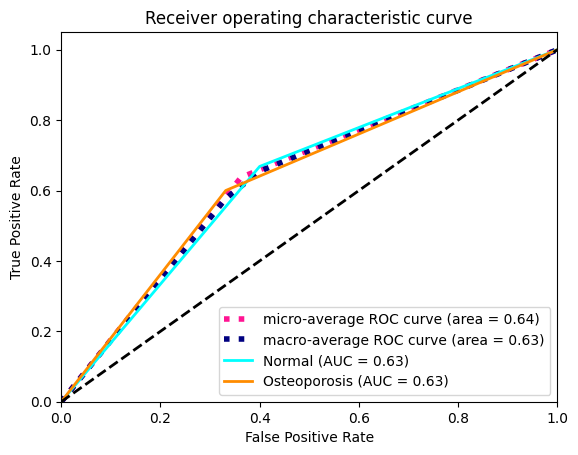

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp


def plot_AUC_ROC(y_true, y_pred):
  n_classes = 2
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  lw = 2
  # Compute macro-average ROC curve and ROC area
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
  # Finally average it and compute AUC
  mean_tpr /= n_classes
  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  # Plot all ROC curves
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"],
    label='micro-average ROC curve (area = {0:0.2f})'
    ''.format(roc_auc["micro"]),
    color='deeppink', linestyle=':', linewidth=4)
  plt.plot(fpr["macro"], tpr["macro"],
    label='macro-average ROC curve (area = {0:0.2f})'
    ''.format(roc_auc["macro"]),
    color='navy', linestyle=':', linewidth=4)
  colors = cycle(['aqua', 'darkorange'])
  classes_list1 = ["Normal", "Osteoporosis"]
  #classes_list1 = [0,1,2,3,4,5,6,7,8,9]
  for i, color,c in zip(range(n_classes), colors,classes_list1):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
      label='{0} (AUC = {1:0.2f})'
      ''.format(c, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")
  #plt.show()

plot_AUC_ROC(y_test1, y_pred_decision)
plt.savefig("/content/drive/MyDrive/VGG16_ROC_1.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')



In [21]:
# Step 2: Create an empty PDF
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Define the path where the empty PDF should be saved
pdf_path = "/content/drive/MyDrive/VGG16_Confusion_2.pdf"

# Create an empty PDF with one blank page
with PdfPages(pdf_path) as pdf:
    plt.figure(figsize=(1, 1))  # Create a small figure
    plt.axis('off')             # Hide axes
    pdf.savefig()               # Save the blank figure to the PDF
    plt.close()


Normalized confusion matrix
[[0.75935829 0.24064171]
 [0.33548387 0.66451613]]


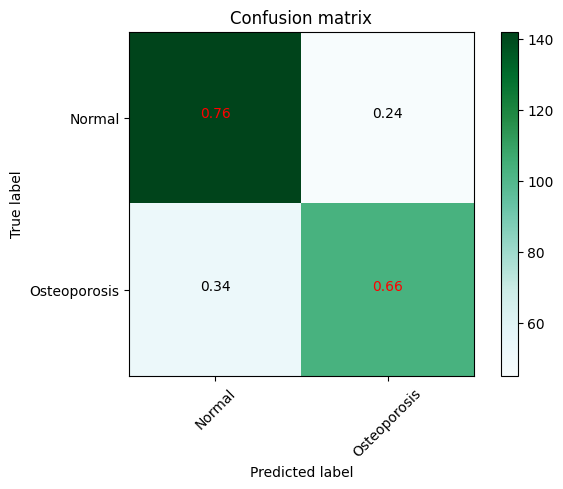

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
normalize=False,
title='Confusion matrix',
cmap=plt.cm.BuGn):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j],fmt),
      horizontalalignment="center",
      color="red" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

y_test2 = y_test;
y_Pred1 = y_pred_decision;

from tensorflow.keras.utils import to_categorical
y_test2 = to_categorical(y_test2)
y_Pred2 = to_categorical(y_Pred1)

plt.clf()
cnf_matrix = metrics.confusion_matrix(y_test1.argmax(axis =1),y_pred_decision)
plot_confusion_matrix(cnf_matrix, classes =["Normal","Osteoporosis"], normalize = True)
plt.savefig("/content/drive/MyDrive/VGG16_Confusion_1.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')



Ensamble Classifier
Accuracy score = 0.716374269005848
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       187
         1.0       0.70      0.66      0.68       155

    accuracy                           0.72       342
   macro avg       0.71      0.71      0.71       342
weighted avg       0.72      0.72      0.72       342

Normalized confusion matrix
[[0.75935829 0.24064171]
 [0.33548387 0.66451613]]


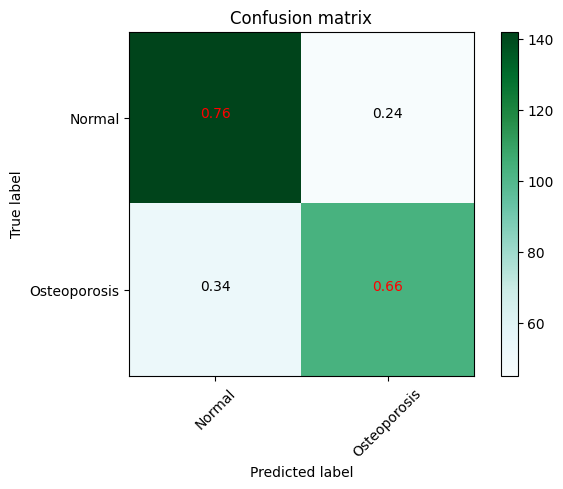

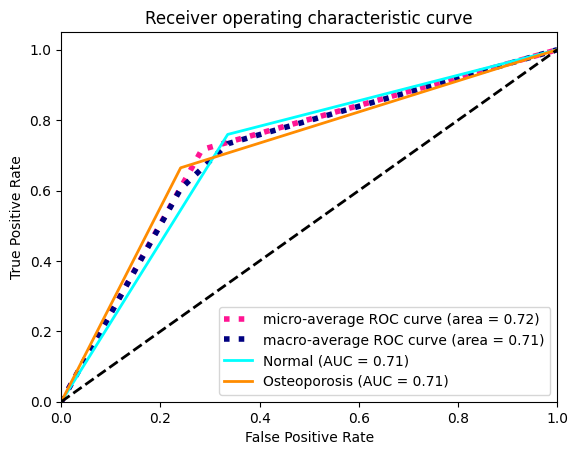

In [30]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
clf3 = DecisionTreeClassifier()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', weights=[4, 1, 1])
eclf.fit(x_train,y_train)
y_pred_decision = eclf.predict(x_test)
print("Ensamble Classifier")
print("Accuracy score =", accuracy_score(y_test, y_pred_decision))
print(metrics.classification_report(y_test, y_pred_decision ))

y_test2 = y_test;
y_Pred1 = y_pred_decision;
from tensorflow.keras.utils import to_categorical
y_test2 = to_categorical(y_test2)
y_Pred2 = to_categorical(y_Pred1)

plt.clf()
cnf_matrix = metrics.confusion_matrix(y_test2.argmax(axis =1),y_Pred2.argmax(axis =1))
plot_confusion_matrix(cnf_matrix, classes =["Normal","Osteoporosis"], normalize = True)
plt.savefig("/content/drive/MyDrive/VGG16_Confusion_1.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')

plot_AUC_ROC(y_test2, y_Pred2)
plt.savefig("/content/drive/MyDrive/VGG16_ROC_1.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204 (816.00 B)

 Trainable params: 204 (816.00 B)

 Non-trainable params: 0 (0.00 B)

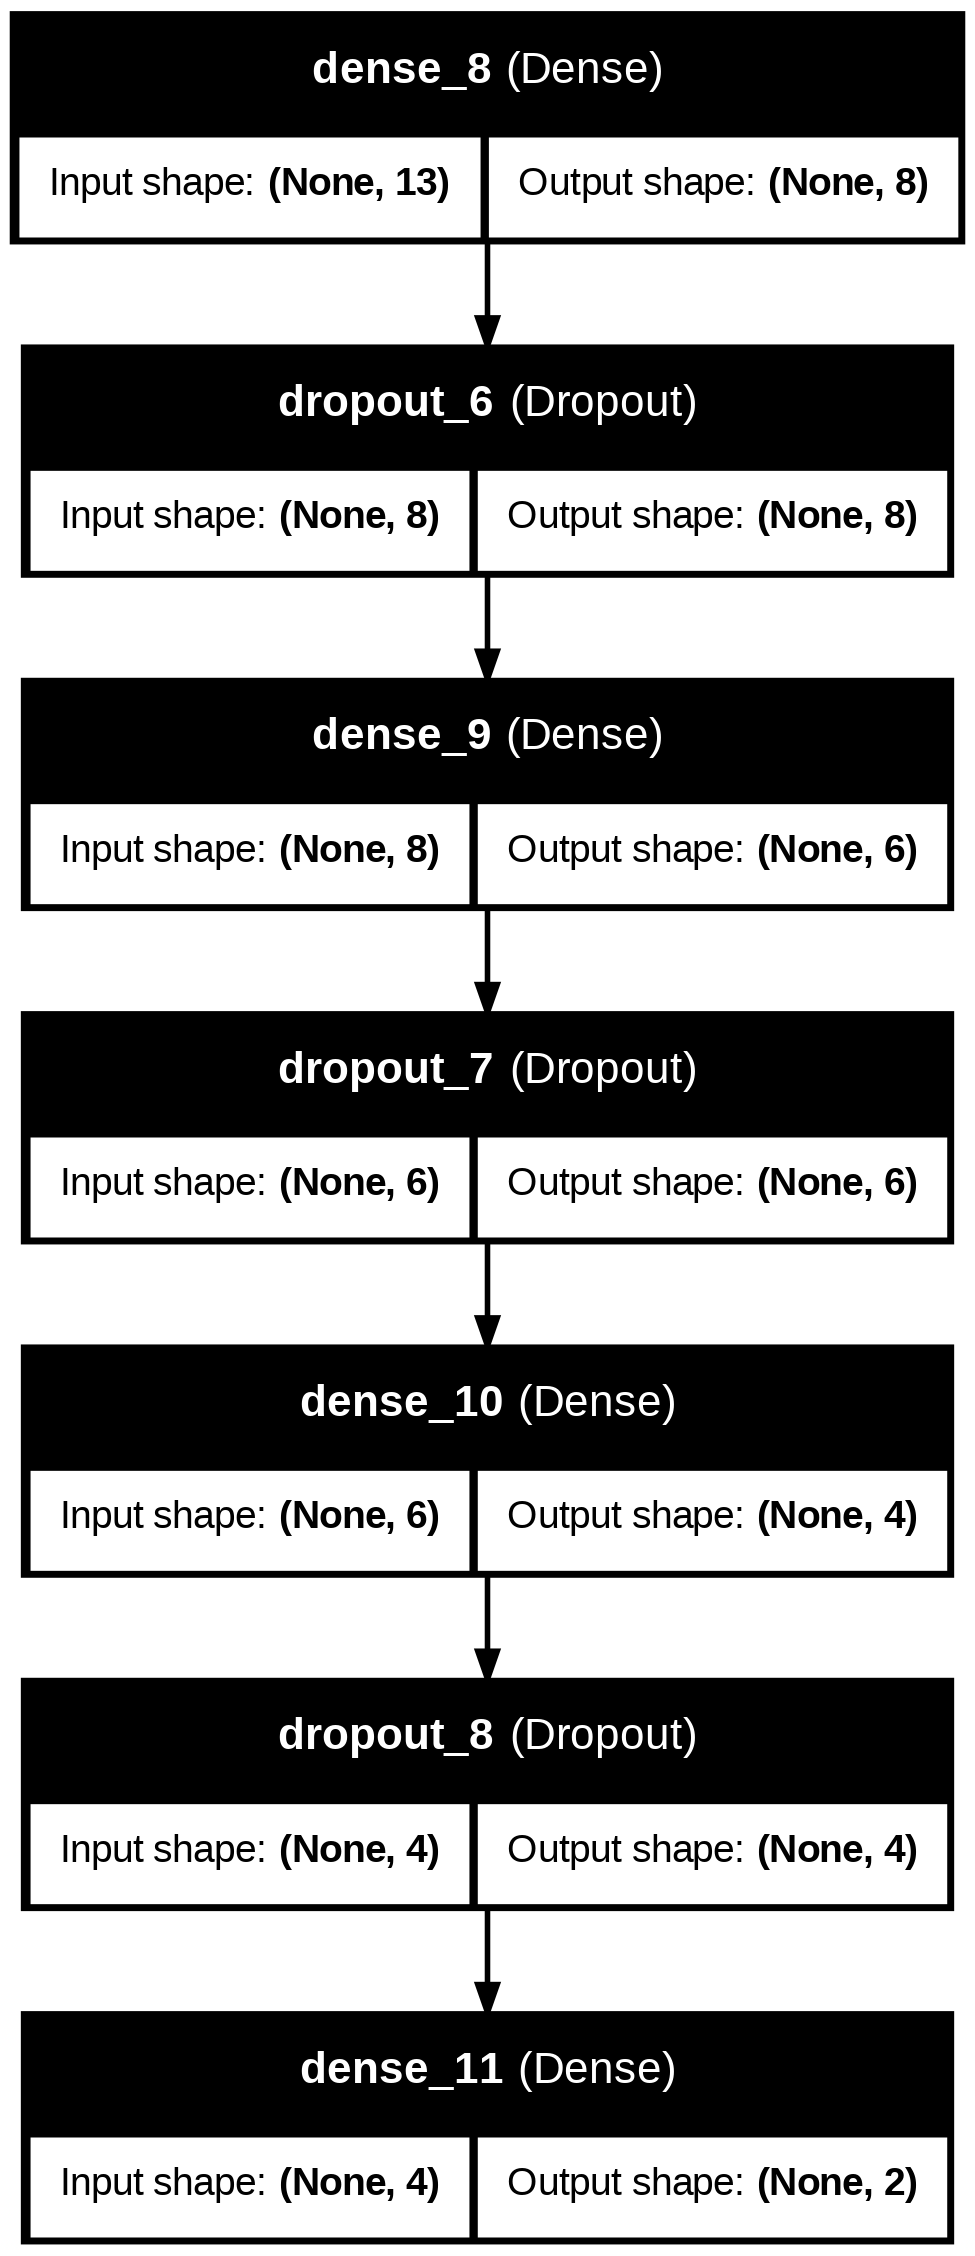

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(2, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [34]:
import tensorflow as tf
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)
# fit the keras model on the dataset
model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=8, verbose =1)

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4811 - loss: 1.6995 - val_accuracy: 0.5497 - val_loss: 0.6973
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5643 - loss: 0.7335 - val_accuracy: 0.5468 - val_loss: 0.6896
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5611 - loss: 0.6926 - val_accuracy: 0.5468 - val_loss: 0.6890
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5577 - loss: 0.6880 - val_accuracy: 0.5468 - val_loss: 0.6887
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5575 - loss: 0.6959 - val_accuracy: 0.5468 - val_loss: 0.6889
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5791 - loss: 0.6859 - val_accuracy: 0.5468 - val_loss: 0.6888
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5503 - loss: 0.6914 - val_accuracy: 0.5468 - val_loss: 0.6891
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5682 - loss: 0.6905 - val_accuracy: 0.

In [35]:
y_pred = model.predict(x_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [36]:
predictions_test = model.predict(x_test)
predictions_test1 = np.zeros_like(y_pred)
predictions_test1[np.arange(len(y_pred)), predictions_test.argmax(1)] = 1

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [37]:
print("Accuracy score =", accuracy_score(y_test_cat, predictions_test1))
print(metrics.classification_report(y_test_cat, predictions_test1))

Accuracy score = 0.5467836257309941
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       187
           1       0.00      0.00      0.00       155

   micro avg       0.55      0.55      0.55       342
   macro avg       0.27      0.50      0.35       342
weighted avg       0.30      0.55      0.39       342
 samples avg       0.55      0.55      0.55       342



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

NameError: name 'X_train' is not defined